In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Load the dataset
file_path = "customer_product_data_1000.csv"  
data = pd.read_csv(file_path)

In [43]:
data.head()

,CustomerID,Age,Gender,Income,Region,AvgSpending,PurchaseFrequency,FavoriteBrand,PreferredStyle,ShoppingMethod,...,ProductPrice,ProductMaterial,ProductStyle,ProductDimensions,ProductDescription,PurchaseDate,QuantityPurchased,CompetitorPrice,CompetitorBrand,DataSource
0,1001,45,Male,51965.71,South,622.68,Quarterly,Target,Bohemian,Both,...,1295.06,Metal,Industrial,30x30x10 inches,Compact and space-saving,2024-01-01,3,666.29,Target,Web Analytics
1,1002,36,Male,40286.22,West,535.31,Monthly,West Elm,Industrial,In-Store,...,327.63,Wood,Minimalist,24x18x15 inches,A stylish addition to any room,2024-01-02,4,1368.56,West Elm,Survey
2,1003,44,Other,78000.43,North,755.95,Weekly,Wayfair,Modern,In-Store,...,1266.73,Metal,Bohemian,12x12x20 inches,A stylish addition to any room,2024-01-03,2,1896.22,Target,Web Analytics
3,1004,65,Male,107219.57,East,497.22,Monthly,Williams-Sonoma,Minimalist,Both,...,1153.97,Metal,Minimalist,12x12x20 inches,A stylish addition to any room,2024-01-04,4,1138.68,IKEA,Survey
4,1005,69,Male,96307.52,East,404.78,Quarterly,Target,Bohemian,Both,...,1124.53,Fabric,Industrial,12x12x20 inches,Durable and eco-friendly,2024-01-05,1,806.35,Target,Survey


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Income                      1000 non-null   float64
 4   Region                      1000 non-null   object 
 5   AvgSpending                 1000 non-null   float64
 6   PurchaseFrequency           1000 non-null   object 
 7   FavoriteBrand               1000 non-null   object 
 8   PreferredStyle              1000 non-null   object 
 9   ShoppingMethod              1000 non-null   object 
 10  SustainabilityConcern       1000 non-null   object 
 11  CustomizationInterest       1000 non-null   object 
 12  BrandLoyaltyScore           1000 non-null   int64  
 13  DiscountSensitivity         1000 n

In [13]:
data.describe

<bound method NDFrame.describe of      CustomerID  Age  Gender     Income Region  AvgSpending PurchaseFrequency  \
0          1001   45    Male   51965.71  South       622.68         Quarterly   
1          1002   36    Male   40286.22   West       535.31           Monthly   
2          1003   44   Other   78000.43  North       755.95            Weekly   
3          1004   65    Male  107219.57   East       497.22           Monthly   
4          1005   69    Male   96307.52   East       404.78         Quarterly   
..          ...  ...     ...        ...    ...          ...               ...   
995        1996   20    Male   46790.75   East       490.03            Weekly   
996        1997   51  Female  110523.94  South       782.81           Monthly   
997        1998   36   Other   52368.24  North       187.82           Monthly   
998        1999   45  Female   38217.80   West       136.22           Monthly   
999        2000   40   Other   97501.37   West       777.91           Month

In [14]:
data['PurchaseDate']=pd.to_datetime(data['PurchaseDate'])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CustomerID                  1000 non-null   int64         
 1   Age                         1000 non-null   int64         
 2   Gender                      1000 non-null   object        
 3   Income                      1000 non-null   float64       
 4   Region                      1000 non-null   object        
 5   AvgSpending                 1000 non-null   float64       
 6   PurchaseFrequency           1000 non-null   object        
 7   FavoriteBrand               1000 non-null   object        
 8   PreferredStyle              1000 non-null   object        
 9   ShoppingMethod              1000 non-null   object        
 10  SustainabilityConcern       1000 non-null   object        
 11  CustomizationInterest       1000 non-null   object       

In [16]:
# Check null values
data.isna().sum()

CustomerID                    0
Age                           0
Gender                        0
Income                        0
Region                        0
AvgSpending                   0
PurchaseFrequency             0
FavoriteBrand                 0
PreferredStyle                0
ShoppingMethod                0
SustainabilityConcern         0
CustomizationInterest         0
BrandLoyaltyScore             0
DiscountSensitivity           0
PurchaseTimeOfDay             0
MarketTrendInterest           0
CompetitorPriceSensitivity    0
ProductID                     0
ProductName                   0
ProductCategory               0
ProductBrand                  0
ProductPrice                  0
ProductMaterial               0
ProductStyle                  0
ProductDimensions             0
ProductDescription            0
PurchaseDate                  0
QuantityPurchased             0
CompetitorPrice               0
CompetitorBrand               0
DataSource                    0
dtype: i

In [18]:
# Average Spending by Region
avg_spending_by_region= data.groupby('Region')['AvgSpending'].mean()
avg_spending_by_region

Region
East     530.430079
North    567.573603
South    555.994566
West     522.358390
Name: AvgSpending, dtype: float64

In [21]:
# Top 5 Favorite Brands
top_brands = data['FavoriteBrand'].value_counts().head(5)
top_brands

FavoriteBrand
IKEA               231
Wayfair            200
West Elm           199
Williams-Sonoma    189
Target             181
Name: count, dtype: int64

In [22]:
# High Loyalty Customers Count
high_loyalty_customers= data[data['BrandLoyaltyScore']>8].shape[0]
high_loyalty_customers

156

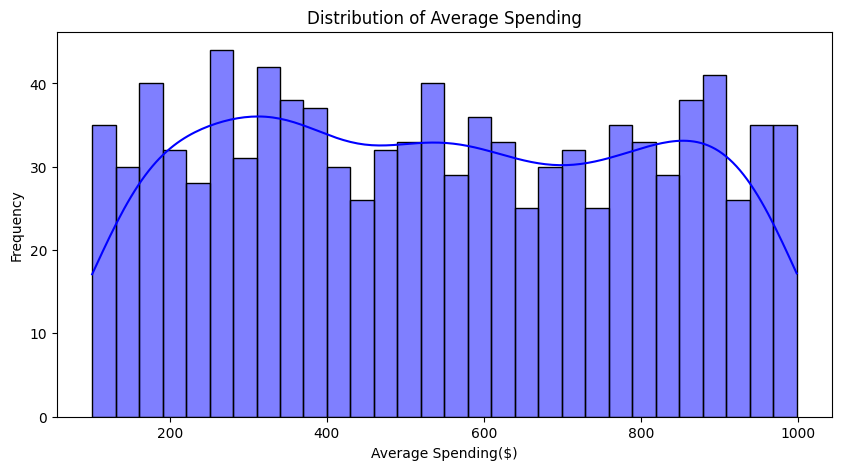

In [23]:
# Spending distribution
plt.figure(figsize=(10,5))
sns.histplot(data['AvgSpending'], bins=30, kde=True, color='blue')
plt.title('Distribution of Average Spending')
plt.xlabel('Average Spending($)')
plt.ylabel("Frequency")
plt.show()


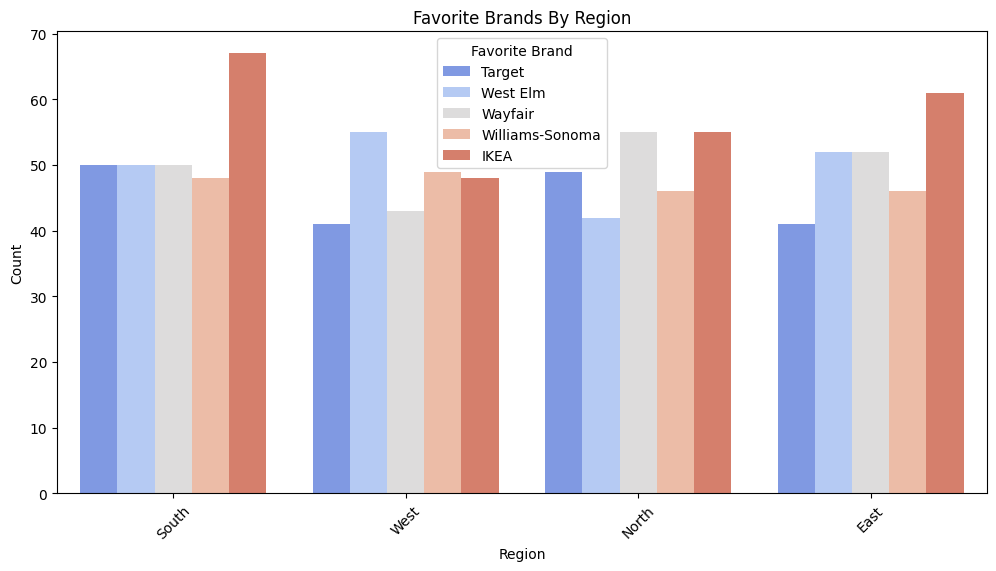

In [25]:
# Brand Preference by Region
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Region', hue='FavoriteBrand', palette='coolwarm')
plt.title("Favorite Brands By Region")
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Favorite Brand')
plt.show()


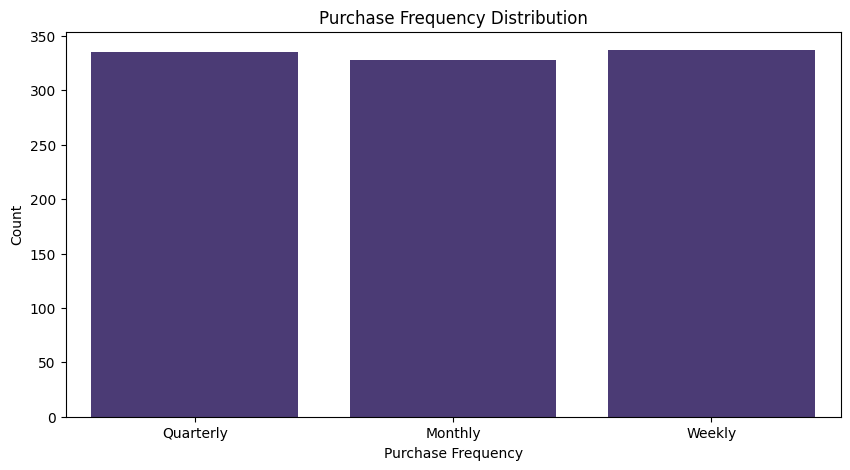

In [27]:
# Purchase Frequency Distribution
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x="PurchaseFrequency", color=sns.color_palette("viridis")[0])
plt.title("Purchase Frequency Distribution")
plt.xlabel("Purchase Frequency")
plt.ylabel("Count")
plt.show()

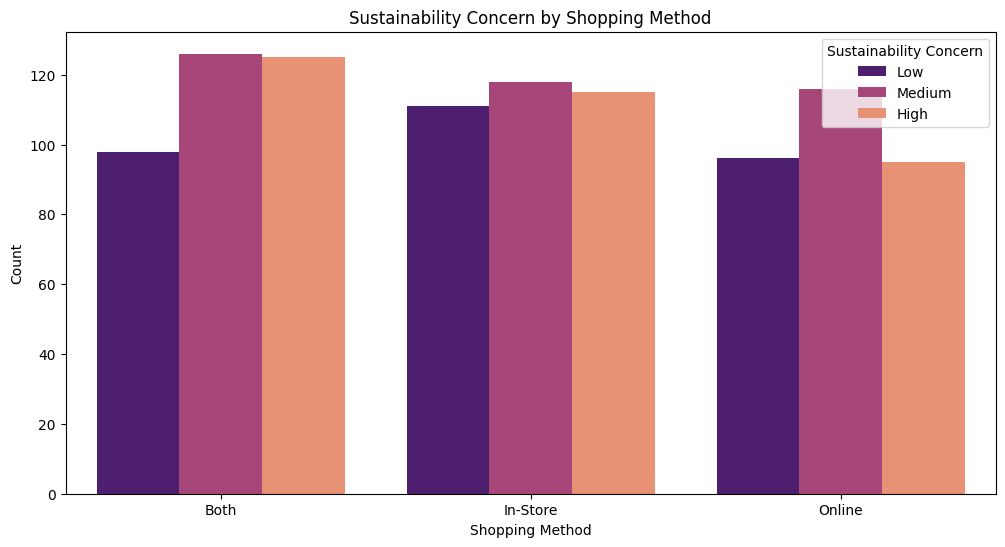

In [29]:
# Sustainability Concern vs. Shopping Method
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="ShoppingMethod", hue="SustainabilityConcern", palette="magma")
plt.title("Sustainability Concern by Shopping Method")
plt.xlabel("Shopping Method")
plt.ylabel("Count")
plt.legend(title="Sustainability Concern")
plt.show()

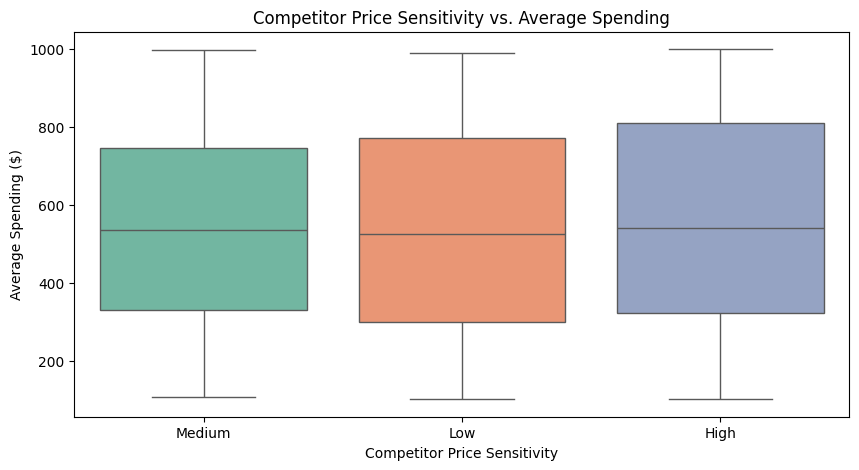

In [31]:
# Competitor Price Sensitivity Analysis
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="CompetitorPriceSensitivity", y="AvgSpending", hue=data["CompetitorPriceSensitivity"], palette="Set2", legend=False)
plt.title("Competitor Price Sensitivity vs. Average Spending")
plt.xlabel("Competitor Price Sensitivity")
plt.ylabel("Average Spending ($)")
plt.show()

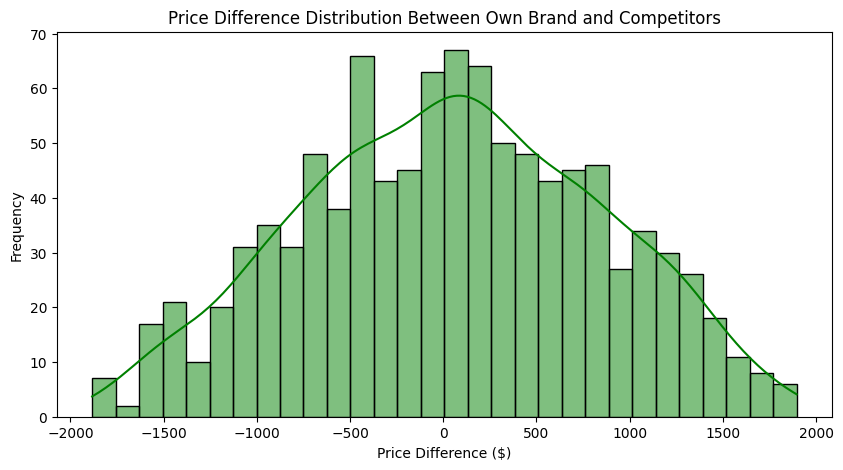

In [33]:
# Competitor Price Comparison
data['PriceDifference'] = data['ProductPrice'] - data['CompetitorPrice']
plt.figure(figsize=(10, 5))
sns.histplot(data['PriceDifference'], bins=30, kde=True, color='green')
plt.title("Price Difference Distribution Between Own Brand and Competitors")
plt.xlabel("Price Difference ($)")
plt.ylabel("Frequency")
plt.show()

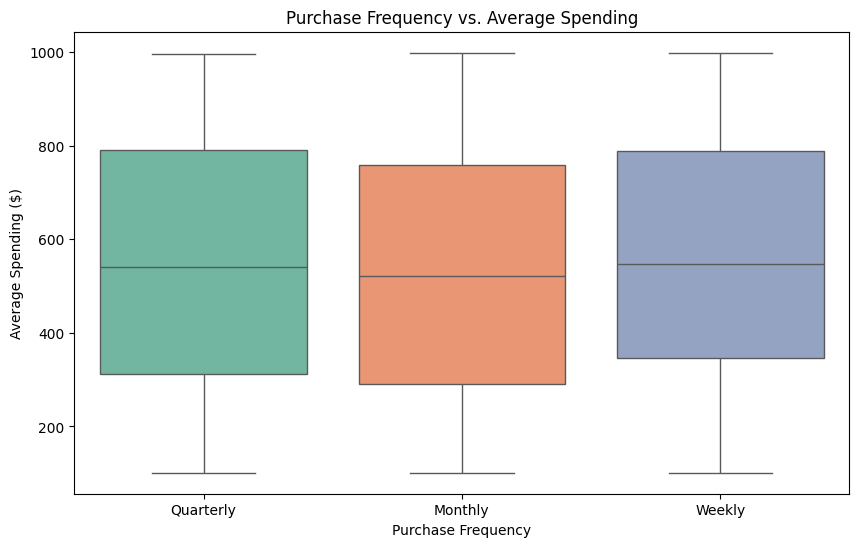

In [35]:
# Customer Purchase Behavior Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='PurchaseFrequency', y='AvgSpending',hue=data['PurchaseFrequency'], palette="Set2", legend=False)
plt.title("Purchase Frequency vs. Average Spending")
plt.xlabel("Purchase Frequency")
plt.ylabel("Average Spending ($)")
plt.show()

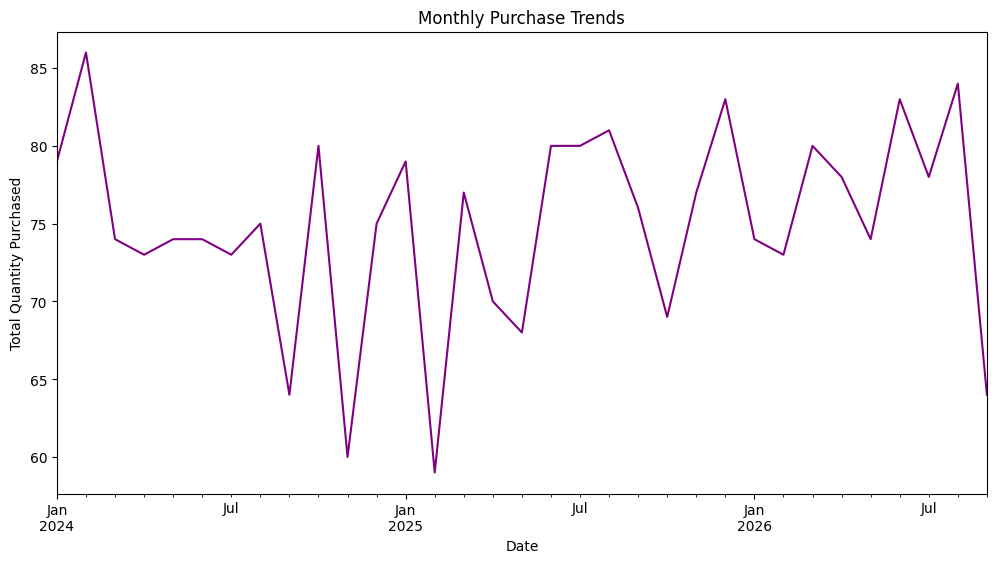

In [44]:
# Time Series Analysis: Purchase Trends Over Time
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])
data.set_index('PurchaseDate', inplace=True)
data['QuantityPurchased'].resample('ME').sum().plot(figsize=(12, 6), color='purple')
plt.title("Monthly Purchase Trends")
plt.xlabel("Date")
plt.ylabel("Total Quantity Purchased")
plt.show()


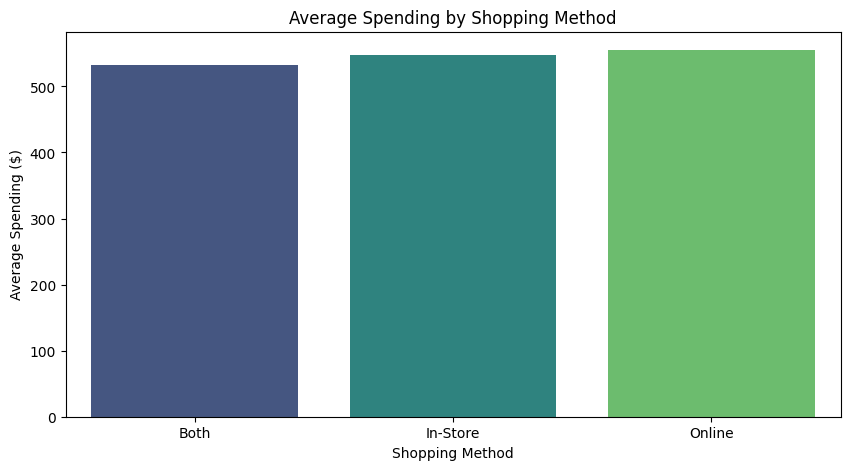

In [46]:
# Shopping Method Trends
plt.figure(figsize=(10, 5))
sns.barplot(data=data_grouped, x='ShoppingMethod', y='AvgSpending', hue='ShoppingMethod', palette='viridis', legend=False)  # Corrected line
plt.title("Average Spending by Shopping Method")
plt.xlabel("Shopping Method")
plt.ylabel("Average Spending ($)")
plt.show()

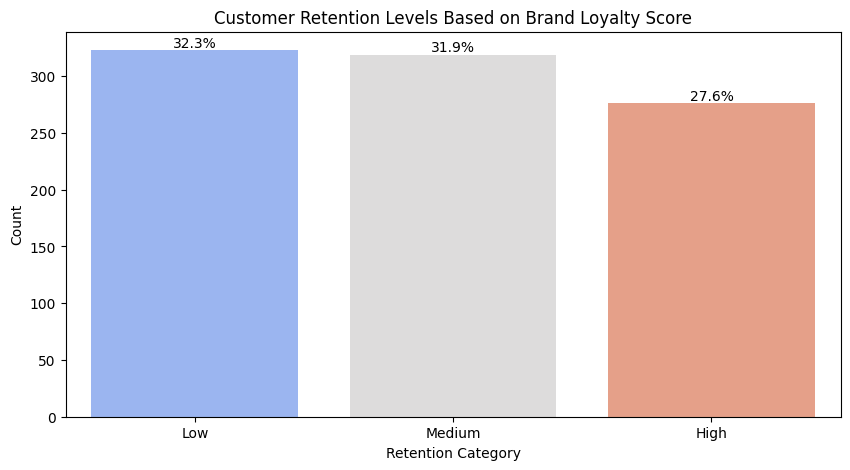

In [50]:
# Customer Retention Analysis
data['RetentionCategory'] = pd.cut(data['BrandLoyaltyScore'], bins=[0, 4, 7, 10], labels=['Low', 'Medium', 'High'], right=False)  
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=data, x='RetentionCategory', hue='RetentionCategory', palette='coolwarm', legend=False)  # Corrected line

plt.title("Customer Retention Levels Based on Brand Loyalty Score")
plt.xlabel("Retention Category")
plt.ylabel("Count")

# Add percentage labels 
total_customers = len(data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_customers)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_14940\3015147690.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='MarketTrendInterest', y='AvgSpending', palette='plasma')


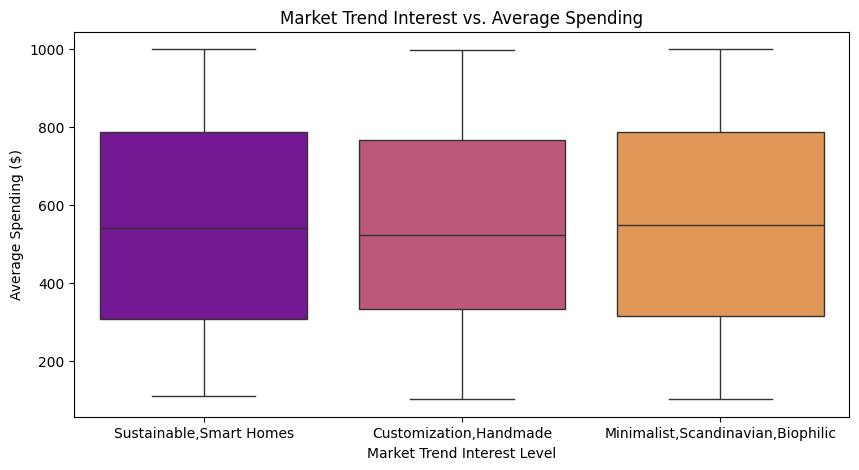

In [51]:
# Market Trend Interest Analysis
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='MarketTrendInterest', y='AvgSpending', palette='plasma')
plt.title("Market Trend Interest vs. Average Spending")
plt.xlabel("Market Trend Interest Level")
plt.ylabel("Average Spending ($)")
plt.show()

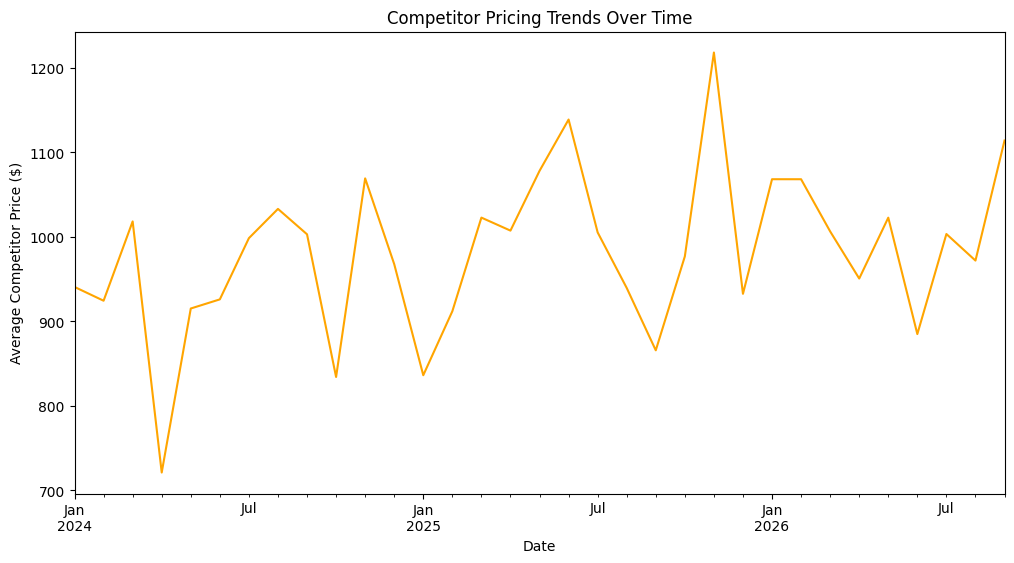

In [53]:
# Competitor Pricing Strategy Over Time
if 'CompetitorPrice' in data.columns:
    data['CompetitorPrice'].resample('ME').mean().plot(figsize=(12, 6), color='orange')  
    plt.title("Competitor Pricing Trends Over Time")
    plt.xlabel("Date")
    plt.ylabel("Average Competitor Price ($)")
    plt.show()